In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import sys

In [2]:
from pathlib import Path
sys.path.insert(0,os.path.abspath('../'))
sys.path.insert(0,os.path.abspath('../utilities'))

In [3]:
from utilities.resnet import resnet50

In [4]:
from utilities.utils import *

In [5]:
seed=566
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

## Resnet 50 on CIFAR-100

In [6]:
model = resnet50(num_classes=100)

In [7]:
LABEL='R50-CIFAR100'

## Getting the hooks for each layers

In [8]:
hookLayersActivationDict = {}
activationDict = {}

In [9]:
modelNamedModules = dict(model.named_modules())

In [10]:
hookLayers = []
for i in modelNamedModules.keys():
    if i.__contains__("bn") or i.__contains__("relu") or i.__contains__("avgpool") or i.__contains__("fc") or i.__contains__("maxpool") :
        hookLayers.append(i)

In [11]:
for layer in hookLayers:
    h = model.get_submodule(layer).register_forward_hook(getActivation(layer,hookLayersActivationDict))

## CIFAR 100

In [12]:
TRAIN_BATCH_SIZE = 256
TEST_BATCH_SIZE = 256
NUM_WORKERS = 0

normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                     std=[0.2675, 0.2565, 0.2761])

train_dataset = datasets.CIFAR100(root='./data', train=True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,
        batch_size=TRAIN_BATCH_SIZE, shuffle=True,
        num_workers=NUM_WORKERS, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        datasets.CIFAR100(root='./data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=TEST_BATCH_SIZE, shuffle=False,
        num_workers=NUM_WORKERS, pin_memory=True)

Files already downloaded and verified


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
model = model.to(device)
valid_acc,activationDict = evaluate(model,device,val_loader,hookLayers,hookLayersActivationDict)

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]


In [15]:
activationDict['bn1'][0].size()

torch.Size([256, 64, 32, 32])

## HSIC calculation and plots

In [16]:
col1,col2,hsicScoreList = getLayerWiseOutputCorrelation(hookLayers,hookLayers,activationDict,activationDict)

Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:5.053819345347525e-38
Denom:0.0
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:5.053819345347525e-38
Denom:0.0
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.002573887817561626

Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:5.172869178721476e-38
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:5.172869178721476e-38
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Layer 1:layer4.0.relu2, HSIC score

Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:4.942423964705102e-38
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:4.942423964705102e-38
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Layer 1:layer4.0.relu2, HSIC score:nan
Cro

Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:4.843717621916834e-38
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:4.843717621916834e-38
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Layer 1:layer4.0.relu2, HS

Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:

Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:4.706812443510456e-38
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:4.706812443510456e-38
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Layer 1:layer4.0.relu2, HSIC score:nan
Cro

Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:5.195097696001368e-38
Denom:0.0
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:5.195097696001368e-38
Denom:0.0
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Layer 1:layer4.0.relu2, HS

Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:4.6267893328873376e-38
Denom:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:4.6267893328873376e-38
Denom:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0009365195292048156
Layer 1:layer4.0.relu2, HSIC score:nan
C

Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:3.331158301602169e-38
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:3.331158301602169e-38
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.005250938702374697
Layer 1:layer4.0.relu2, HSIC score

Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:3.306377739559049e-39
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:3.306377739559049e-39
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Layer 1:layer4.0.relu2, HSIC score

Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.48866507955023e-38
Denom:0.0
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.48866507955023e-38
Denom:0.0
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Layer 1:layer4.0.relu2, HSIC score:n

Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:2.939814876873249e-39
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:2.939814876873249e-39
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:9.958561264511445e-08
Layer 1:layer4.0.relu2, HSIC score:nan
Cro

Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:5.362786531809706e-36
Denom:0.0
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:5.362786531809706e-36
Denom:0.0
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:570748544.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:5

/home/abc586/courseWork/introtodlsystem/finalProject/visualizing-vision-models/utilities/utils.py:104: RuntimeWarning: invalid value encountered in double_scalars
  finalScore = hsicCross/denom


Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Layer 1:la

Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:2.14398665041697e-43
Denom:0.0
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:2.14398665041697e-43
Denom:0.0
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Layer 1:layer4.0.rel

Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:1.4876201659408395e-10
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:1.4876201659408395e-10
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:3.645266999363848e+26
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:3.645266999363848e+26
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:2.7057255184132867e-16
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Lay

Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:2.7057255184132867e-16
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:2.7057255184132867e-16
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.bn2, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.relu2, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.bn3, HSIC score:6.028260878050738e-31
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.5.bn1, H

Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.4.relu2, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.4.bn3, HSIC score:6.028260878050738e-31
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:6.028260878050738e-31
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.3357119858264923
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.3357119858264923
Cross HSIC

Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.bn1, HSIC score:3.4715500873971905e-07
Cross HSIC score:3.309163520906127e-39
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.relu1, HSIC score:3.4715500873971905e-07
Cross HSIC score:3.309163520906127e-39
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.bn2, HSIC score:0.008911041542887688
Cross HSIC score:3.498284723469254e-38
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.relu2, HSIC score:0.008911041542887688
Cross HSIC score:3.498284723469254e-38
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.bn3, HSIC score:7.17457760401885e-06
Cross HSIC score:1.4900753463247265e-38
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.0.relu3, HSIC score:7.17457760401885e-06
Cross HSIC score:1.4900753463247265e-38
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.1.bn1, HSIC score:5.615101337432861
Cross HSIC score:3.478234104262616e-38
Denom:0.0
Layer 1:lay

Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0008484289282932878
Cross HSIC score:4.846600373117643e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0008484289282932878
Cross HSIC score:4.846600373117643e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0010616505751386285
Cross HSIC score:4.848124985846828e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0010616505751386285
Cross HSIC score:4.848124985846828e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:4.579549568006769e-05
Cross HSIC score:3.201525021446559e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Cross HSIC score:3.201525021446559e-38
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Cross HSIC score:3.816318658517636e-38
De

Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.bn1, HSIC score:0.3357119858264923
Cross HSIC score:1.1998197711241949e-40
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.relu1, HSIC score:0.3357119858264923
Cross HSIC score:1.1998197711241949e-40
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Cross HSIC score:1.7570015912554213e-35
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.0.relu3, HSIC score:1.7079081535339355
Cross HSIC score:1.7570015912554213e-35
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:4.579549568006769e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.00021554462728090584
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.00021554462728090584
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.0025950013659894466
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.0025950013659894466
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.0007755226688459516
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.0007755226688459516
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0010505352402105927
Cross HSIC score:nan
Denom:nan
Layer 

Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.0007755226688459516
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0010505352402105927
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0010505352402105927
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.0013373434776440263
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.0013373434776440263
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00010620849207043648
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00010620849207043648
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0005564971943385899
Cross HSIC score:nan


Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.756161583451501e-35
Denom:0.0
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.756161583451501e-35
Denom:0.0
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:

Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.3357119858264923
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.3357119858264923
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score

Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:2.2322190382803876e-36
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:avgpool, HSIC score:7.804946951154663e+31
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:fc, HSIC score:1610447.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Cross HS

Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002776585752144456
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002776585752144456
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0012870662612840533
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0012870662612840533
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0016212085029110312
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0016212085029110312
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.0013301069848239422
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.0013301069848239422
Cross HSIC score:nan
Deno

Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:0.3357119858264923
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:0.3357119858264923
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score

Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:1.7079081535339355
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:5.916562792341728e-26
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:5.916562792341728e-26
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC scor

Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:2.2322190382803876e-36
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:avgpool, HSIC score:7.804946951154663e+31
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:fc, HSIC score:1610447.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:bn1, HSIC score:0.0025738878175616264
Cross HSIC score:nan
D

Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:2.2322190382803876e-36
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


In [17]:
import pandas as pd
import seaborn as sns

In [18]:
import matplotlib.ticker as ticker

In [19]:
hsicData = {
    'L1' : col1,
    'L2' : col2,
    'hsic':hsicScoreList
}

hsicDataFrame = pd.DataFrame(data=hsicData)
hsicDataFrame = hsicDataFrame.pivot("L1", "L2", "hsic")

/tmp/ipykernel_1693780/169922613.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(LABEL+'.pdf',fmt='pdf',bbox_inches='tight')


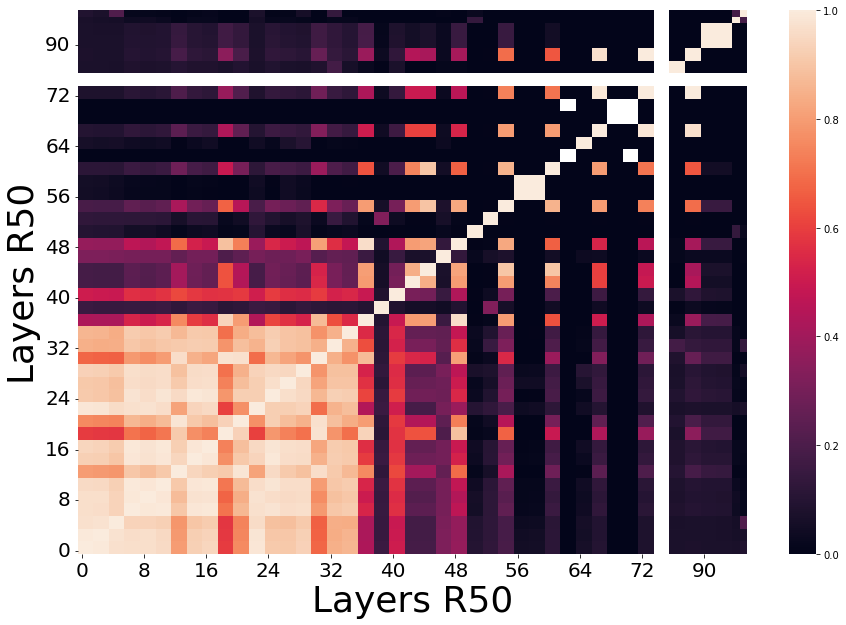

In [20]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(hsicDataFrame.T)
plt.xlabel("Layers R50",fontsize='36')
plt.ylabel("Layers R50",fontsize='36')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.invert_yaxis()
plt.savefig(LABEL+'.pdf',fmt='pdf',bbox_inches='tight')